In [50]:
# pivot table

import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

In [2]:
import ast
df[['job_title_short','job_skills', 'job_type_skills']].head(10)
type(ast.literal_eval(df['job_skills'][1]))


list

In [3]:
df['job_title_short'].value_counts()

job_title_short
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Business Analyst              49063
Software Engineer             44929
Senior Data Engineer          44563
Senior Data Scientist         36957
Senior Data Analyst           29216
Machine Learning Engineer     14080
Cloud Engineer                12331
Name: count, dtype: int64

In [4]:
df.groupby('job_title_short').size()

job_title_short
Business Analyst              49063
Cloud Engineer                12331
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Machine Learning Engineer     14080
Senior Data Analyst           29216
Senior Data Engineer          44563
Senior Data Scientist         36957
Software Engineer             44929
dtype: int64

In [5]:
# pivot tabel
df.pivot_table(index='job_title_short',aggfunc='size')


job_title_short
Business Analyst              49063
Cloud Engineer                12331
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Machine Learning Engineer     14080
Senior Data Analyst           29216
Senior Data Engineer          44563
Senior Data Scientist         36957
Software Engineer             44929
dtype: int64

In [6]:
df.pivot_table(index='job_country',values=['salary_year_avg'],columns='job_title_short',aggfunc='median')

salary_year_avg                                            \
job_title_short Business Analyst Cloud Engineer Data Analyst Data Engineer   
job_country                                                                  
Albania                      NaN            NaN     49950.00           NaN   
Algeria                      NaN            NaN     44100.00       45000.0   
Argentina                71100.0       197500.0     92771.75       96773.0   
Armenia                      NaN            NaN    100500.00       48750.0   
Australia                70000.0       110000.0    109500.00      106712.5   
...                          ...            ...          ...           ...   
Uruguay                      NaN            NaN    100500.00           NaN   
Uzbekistan                   NaN            NaN          NaN           NaN   
Vietnam                  79200.0            NaN     75550.00       96773.0   
Zambia                       NaN            NaN          NaN           NaN   
Zimbabwe                     NaN            NaN     63000.00           NaN   

                                                                              \
job_title_short Data Scientist Machine Learning Engineer Senior Data Analyst   
job_country                                                                    
Albania               69981.25                       NaN                 NaN   
Algeria                    NaN                       NaN                 NaN   
Argentina             71000.00                  101029.0                 NaN   
Armenia                    NaN                   87021.0                 NaN   
Australia            139216.00                  101029.0             50640.0   
...                        ...                       ...                 ...   
Uruguay                    NaN                   50000.0                 NaN   
Uzbekistan            30750.00                       NaN                 NaN   
Vietnam               70000.00                   57600.0            105837.5   
Zambia                90670.00                       NaN                 NaN   
Zimbabwe              69085.00                       NaN                 NaN   

                                                                              
job_title_short Senior Data Engineer Senior Data Scientist Software Engineer  
job_country                                                                   
Albania                          NaN              157500.0               NaN  
Algeria                          NaN                   NaN               NaN  
Argentina                   147500.0                   NaN          174500.0  
Armenia                          NaN                   NaN               NaN  
Australia                   147500.0              157500.0          118350.0  
...                              ...                   ...               ...  
Uruguay                          NaN               57500.0               NaN  
Uzbekistan                       NaN                   NaN               NaN  
Vietnam                     147500.0               79200.0           53600.0  
Zambia                           NaN                   NaN               NaN  
Zimbabwe                         NaN                   NaN               NaN  

[108 rows x 10 columns]

job_title_short,Data Analyst,Data Engineer,Data Scientist
job_country,,,
United States,90000.0,125000.0,130000.0
India,100500.0,147500.0,114008.0
United Kingdom,87750.0,110000.0,105300.0
France,69175.0,98301.5,88128.0
Germany,103750.0,147500.0,131560.0
Spain,91977.0,133000.0,88128.0


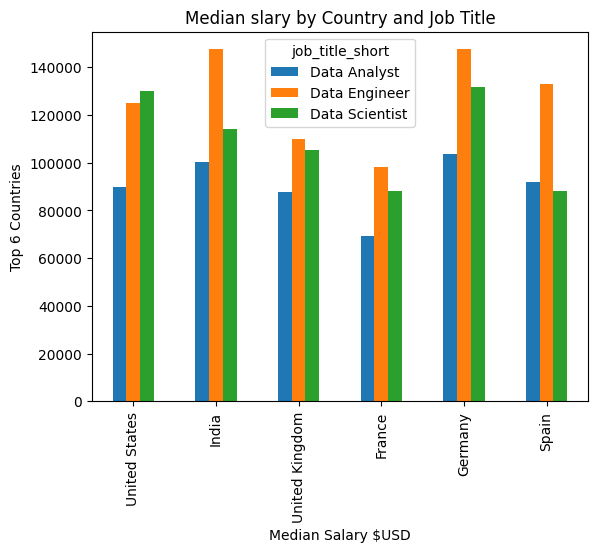

In [46]:
top_country = df['job_country'].value_counts().sort_values(ascending=False).head(6).index
df_jobs_country_pivot = df.pivot_table(index='job_country',values=['salary_year_avg'] ,columns='job_title_short',aggfunc='median')

df_jobs_country_pivot = df_jobs_country_pivot.loc[top_country]

job_title = ['Data Analyst','Data Engineer','Data Scientist']
# df_jobs_country = df_jobs_country.loc[:, ('salary_year_avg', jobs)]
df_jobs_country_pivot.columns = df_jobs_country_pivot.columns.droplevel(0)

df_jobs_country_pivot = df_jobs_country_pivot[job_title]
df_jobs_country_pivot.plot(kind='bar')
plt.xlabel('Median Salary $USD')
plt.ylabel('Top 6 Countries')
plt.title('Median slary by Country and Job Title')
# plt.xticks(rotation =45,ha='left')
df_jobs_country_pivot



Text(0.5, 0, 'countries top job title')

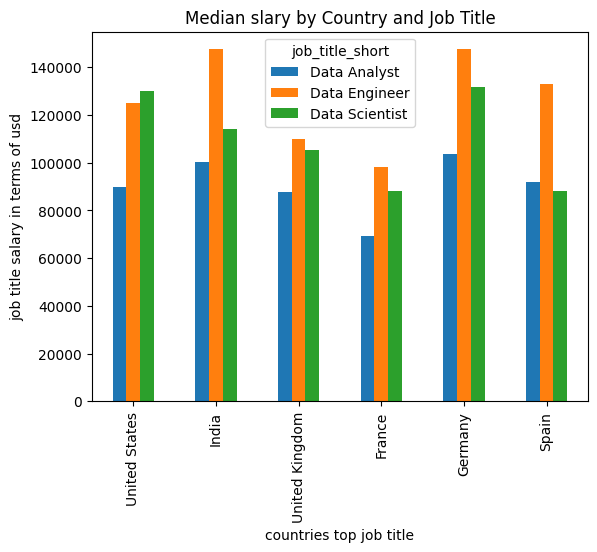

In [52]:
# top 6 countries
top_country = df['job_country'].value_counts().sort_values(ascending=False).head(6).index
job_title = ['Data Analyst','Data Engineer','Data Scientist']
Country_and_JobTitle_Salary_Median = df.pivot_table(index='job_country',columns='job_title_short',values=['salary_year_avg'],aggfunc='median')
Country_and_JobTitle_Salary_Median = Country_and_JobTitle_Salary_Median.loc[top_country]
Country_and_JobTitle_Salary_Median.columns = Country_and_JobTitle_Salary_Median.columns.droplevel(0)
Country_and_JobTitle_Salary_Median = Country_and_JobTitle_Salary_Median[job_title]

Country_and_JobTitle_Salary_Median.plot(kind='bar')

plt.title('Median slary by Country and Job Title')
plt.ylabel('job title salary in terms of usd')
plt.xlabel('countries top job title')

Text(0.5, 0, 'countries top job title')

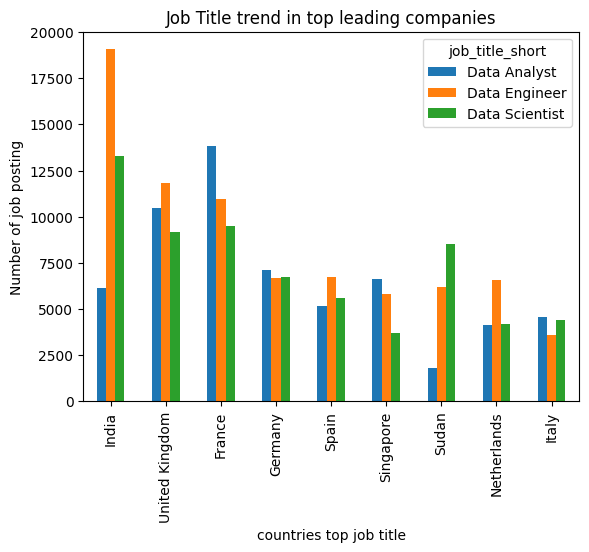

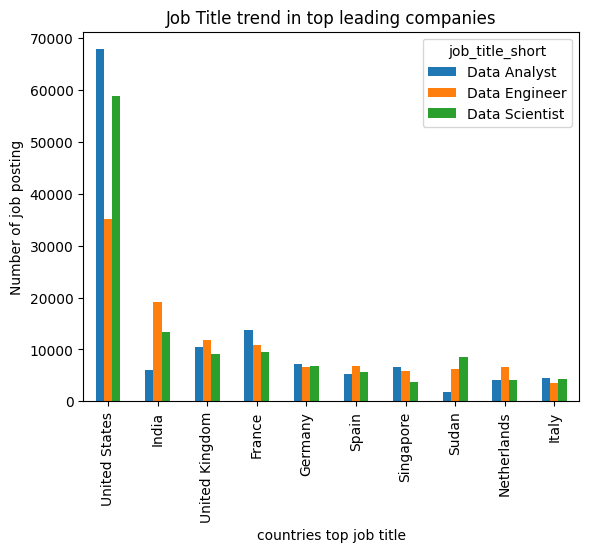

In [54]:
c1 = df['job_country'].value_counts().sort_values(ascending=False).head(10).index
job_title = ['Data Analyst','Data Engineer','Data Scientist']
p1 = df.pivot_table(index='job_country' , columns=['job_title_short'] ,values='job_title',aggfunc='count')
p1 = p1.loc[c1]
p1 = p1[job_title]
p1.iloc[1:].plot(kind='bar')
plt.title('Job Title trend in top leading companies')
plt.ylabel('Number of job posting')
plt.xlabel('countries top job title')

p1.plot(kind='bar')
plt.title('Job Title trend in top leading companies')
plt.ylabel('Number of job posting')
plt.xlabel('countries top job title')


